# Assignment 1

Name:         AADIL AKHTARHUSEN KHATRI                                                
Student ID:   49747231

## Project Description

This project contains data of a Combined Cycle Power Plant over 6 years.
The data set contains features like houly average Ambient Temperature(T), Ambient Pressure (AP), Relative Humidity (RH), and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In this project we will build a Multiple Regression and SVM Regression models to predict the Electerical Energy Output of new data point feeded to the system.

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Power plant data as pandas dataframe and checking the Data

In [2]:
plant_data = pd.read_csv("Power Plant Data.csv")

In [3]:
plant_data.head()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Hourly Electrical Energy output (MW)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
plant_data.info()
plant_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ambient Temperature (C)               9568 non-null   float64
 1   Exhaust Vacuum (cm Hg)                9568 non-null   float64
 2   Ambient Pressure (milibar)            9568 non-null   float64
 3   Relative Humidity (%)                 9568 non-null   float64
 4   Hourly Electrical Energy output (MW)  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Index(['Ambient Temperature (C) ', 'Exhaust Vacuum (cm Hg)',
       'Ambient Pressure (milibar)', 'Relative Humidity (%)',
       'Hourly Electrical Energy output (MW)'],
      dtype='object')

This shows that there is no missing data and all the column as 9568 data points, so no need to worry about missing data

In [5]:
plant_data.describe()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Hourly Electrical Energy output (MW)
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Visualising the Data to know how each feature affect the Energy Output of the Power Plant

<Axes: xlabel='Ambient Temperature (C) ', ylabel='Hourly Electrical Energy output (MW)'>

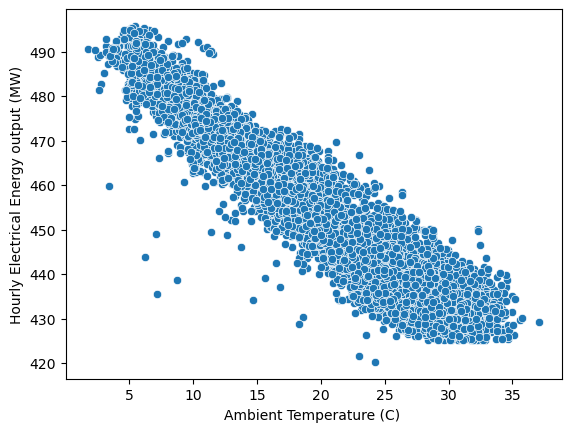

In [6]:
sns.scatterplot(x='Ambient Temperature (C) ', y='Hourly Electrical Energy output (MW)', data=plant_data)

It can be seen that as the Ambient Temperature Increases the Hourly Energy Output Decreases

<Axes: xlabel='Exhaust Vacuum (cm Hg)', ylabel='Hourly Electrical Energy output (MW)'>

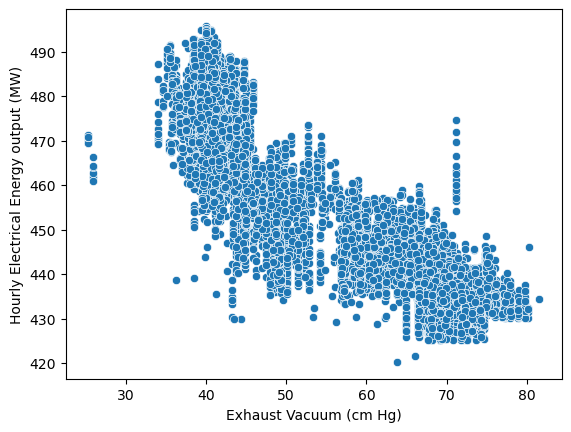

In [7]:
sns.scatterplot(x='Exhaust Vacuum (cm Hg)', y='Hourly Electrical Energy output (MW)', data=plant_data)

Also as Exhaust Vaccum increases the Hourly Energy Output Decreases but it is not as linear as relationship with Ambient Temperature

<Axes: xlabel='Ambient Pressure (milibar)', ylabel='Hourly Electrical Energy output (MW)'>

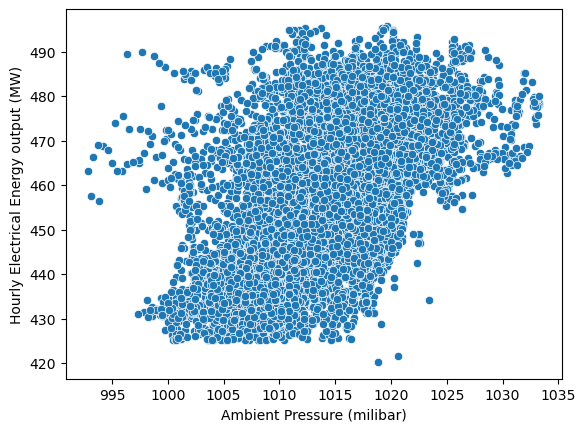

In [8]:
sns.scatterplot(x='Ambient Pressure (milibar)', y='Hourly Electrical Energy output (MW)', data=plant_data)

<Axes: xlabel='Relative Humidity (%)', ylabel='Hourly Electrical Energy output (MW)'>

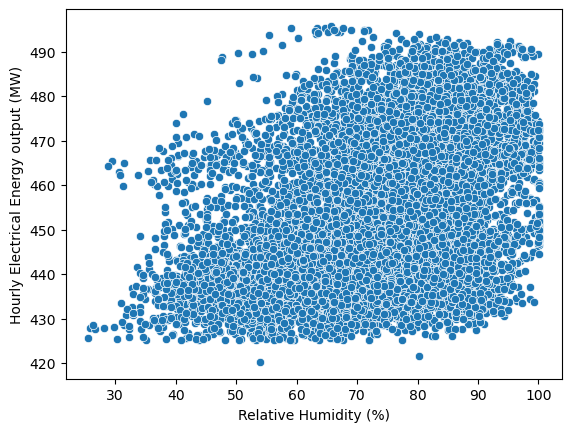

In [9]:
sns.scatterplot(x='Relative Humidity (%)', y='Hourly Electrical Energy output (MW)', data=plant_data)

## Now we spilt the dataset into X(Features) and Y(Output)

In [10]:
x = plant_data.iloc[:, :-1].values
y = plant_data.iloc[:,-1].values


## Now we spilt the dataset into Train and Test Data

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [12]:
x_train.shape

(7654, 4)

In [13]:
y_train.shape

(7654,)

## Feature Scaling to bring all the feature in the same scale

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

## Building A linear regression model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model_LR = LinearRegression()

In [18]:
model_LR.fit(x_train, y_train)

LinearRegression()

## Testing the Linear Regression Model

In [19]:
y_predict_train = model_LR.predict(x_train)
compare_train=[y_train, y_predict_train]
pd.DataFrame(compare_train)

,0,1,2,3,4,5,6,7,8,9,...,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653
0,484.320000,449.040000,471.860000,429.050000,441.830000,479.5900,447.960000,442.780000,461.730000,431.930000,...,440.930000,440.090000,447.840000,442.700000,449.700000,437.990000,446.570000,462.560000,450.370000,452.940000
1,480.821868,446.142611,477.522015,438.521666,449.014586,474.7039,448.903152,445.479391,461.870589,428.964365,...,444.286936,444.546399,450.028129,445.418726,442.114037,438.384747,450.632532,460.451469,453.587422,453.978823


## Visualising the output of the linear regression model with the real output

C:\Users\aadil\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0, 0.5, '[480.82186787 446.14261114 477.52201456 ... 460.4514692  453.5874222\n 453.97882252]')

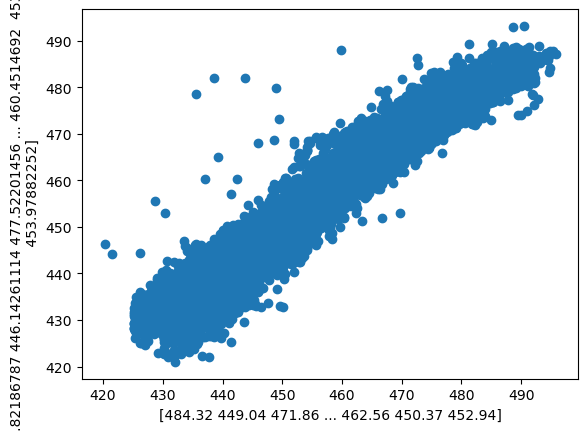

In [20]:
plt.figure()
plt.scatter(y_train, y_predict_train)
plt.xlabel(y_train)
plt.ylabel(y_predict_train)

In [21]:
from sklearn.metrics import r2_score

r2_score(y_train, y_predict_train)

0.9277745463518707

The coefficient of determination in Linear Regression Model for the train dataset is 0.9277.

## Scaling the features of the test set to check the accuracy of the test data set. This needs to be done beacuase the model was build on the scaled data.

In [22]:
x_test = sc.transform(x_test)

## Testing the Data on the test set

In [23]:
y_predict_test = model_LR.predict(x_test)
compare_test=[y_test, y_predict_test]
pd.DataFrame(compare_test)

,0,1,2,3,4,5,6,7,8,9,...,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913
0,458.960000,463.290000,435.270000,484.31000,473.550000,456.300000,436.020000,488.750000,469.750000,482.830000,...,438.28000,432.190000,494.870000,463.500000,449.330000,446.400000,457.120000,476.220000,440.290000,467.920000
1,457.255221,466.719274,440.366949,482.57801,474.880547,448.824227,440.149749,478.061406,466.985618,479.480139,...,430.63655,428.319126,487.944282,464.437471,455.293903,445.676877,447.891673,476.405029,424.616097,463.911411


In [24]:
r2_score(y_test, y_predict_test)

0.9321860060402446

The coefficient of determination in Linear Regression for the train dataset is 0.93218. Which means the model perform better on test data as compared to train data for this Linear Regression model

## Building a SVM Regression Model

In [25]:
from sklearn.svm import SVR


In [26]:
Model_SVR = SVR(kernel = 'rbf')
Model_SVR.fit(x_train, y_train)

SVR()

## Testing a SVM Regression model

In [27]:
y_predict_train_SVR = Model_SVR.predict(x_train)
compare_train_SVR=[y_train, y_predict_train_SVR]
pd.DataFrame(compare_train_SVR)

,0,1,2,3,4,5,6,7,8,9,...,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653
0,484.320000,449.040000,471.860000,429.050000,441.830000,479.590000,447.960000,442.780000,461.730000,431.93000,...,440.930000,440.090000,447.840000,442.70000,449.70000,437.990000,446.570000,462.560000,450.370000,452.940000
1,484.169533,445.158141,478.755109,436.749418,447.581652,475.645844,449.472827,443.626316,461.034508,431.43202,...,444.900908,442.046969,448.932116,444.66586,440.09343,439.649019,445.897113,458.998061,452.168765,451.825694


In [28]:
r2_score(y_train, y_predict_train_SVR)

0.9400135824491649

The coefficient of determination for the Train dataset in SVR Model is 0.94.

In [29]:
y_predict_test_SVR = model_LR.predict(x_test)
compare_test_SVR=[y_test, y_predict_test_SVR]
pd.DataFrame(compare_test)

,0,1,2,3,4,5,6,7,8,9,...,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913
0,458.960000,463.290000,435.270000,484.31000,473.550000,456.300000,436.020000,488.750000,469.750000,482.830000,...,438.28000,432.190000,494.870000,463.500000,449.330000,446.400000,457.120000,476.220000,440.290000,467.920000
1,457.255221,466.719274,440.366949,482.57801,474.880547,448.824227,440.149749,478.061406,466.985618,479.480139,...,430.63655,428.319126,487.944282,464.437471,455.293903,445.676877,447.891673,476.405029,424.616097,463.911411


In [30]:
r2_score(y_test, y_predict_test_SVR)

0.9321860060402446

The coefficient of determination for the test dataset in SVR Model is 0.9321.

## Conclusion and Comparision of the Two methods

- For Training Dataset the r2_score for Linear Regression model is 0.9277.

- For Test Dataset the r2_score for Linear Regression model is 0.9321.

- For Training Dataset the r2_score for SVM Regression model is 0.9400.

- For Test Dataset the r2_score for SVM Regression model is 0.9321.

- In the Test Dataset the r2_score for both the data sets is approximately same whereas for the train Dataset it can be seen that the SVM Regression model perform slightly better than the Linear Regression Model.

- Also it is seen that the scaling of the Data drastically affects the accuracy of SVM Regression model and the accuracy of the model drastically increases but in case Linear Regression Model there is not much effect because of the scaling

